1. Problem definition.

The problem that we are going to implement is, 

Use case: Is there a relationship between humidity and temperature? What about between humidity and apparent temperature? Can you predict the apparent temperature given the humidity?

Before implement a machine learning model, there is an a complete idea about the problem domain that you are going to implement the solution.

Here discuss about the humidity, temperature, and apparent temperature. So we need to the clear knowladge about these terms.

In simple, Humidity is a measure of the amount of water vapor in the air.

Apparent Temperature: The perceived temperature in degrees Fahrenheit derived from either a combination of temperature and wind (Wind Chill) or temperature and humidity (Heat Index) for the indicated hour.
source(https://meteor.geol.iastate.edu/~ckarsten/bufkit/apparent_temperature.html)

2. Collect data

The collecting data to the relevent problem domain is important because your solution is based on the quality and the quentity of the data. The data directly impact to the your machine learning model and its accuracy.

The dataset to the our problem is taken from the kegalle. 
https://www.kaggle.com/budincsevity/szeged-weather?select=weatherHistory.csv


3. Data preprocessing

Data preprocessing is a data mining technique which is used to transform the raw data in a useful and efficient format. Under the data preprocessing Filling missing values, removing duplicates, dealing with outliers, Data Transformations, Splitting the dataset, feature scaling are mainly done.
As the first step of the coding, it is needed to import the Data. Here imports the CSV file into Python using Pandas.


In [1]:
# import the needed packages.
import pandas as pd
import numpy as np

In [2]:
weather_history_df = pd.read_csv('weatherHistory.csv')

In [3]:
# print first 5 rows of the dataset
weather_history_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
# describe the dataset
weather_history_df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


4. Find the missing values

the weather_history_df's Precip Type has 517 missing values and it 0.05% as presentage. so drop them.

In [5]:
df = weather_history_df.copy()
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

* Precip Type has 517 null values 

In [6]:
# missing values presentage 'Precip Type'

print('Precip Type null values presentage = ', df['Precip Type'].isnull().sum()/len(df.index)*100)
print(df['Precip Type'].value_counts())
print('rain value presentage ', (df['Precip Type'] == 'rain').sum()/len(df.index)*100)

Precip Type null values presentage =  0.5360123583506993
rain    85224
snow    10712
Name: Precip Type, dtype: int64
rain value presentage  88.35806040247581


* only 0.5% null values in the Precip Type column and lets remove them 

In [7]:
# drop missing values

df = df.dropna() #drop all nan
# reset the df after dropping rows
df = df.reset_index(drop=True)
print(df.isnull().any())

Formatted Date              False
Summary                     False
Precip Type                 False
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool


* now no any null values in the dataset

5.

The coloumn 'Formatted Date' all are unique 95912 out if 95936 (99%). According to the problem domain the date not much effect to the problem domain. 
The coloumn 'Loud Cover' has only one unique value out of the all rows.
The 'Daily Summary' is an categorical feature and it has 214 uniques values.Also its top one is 'Mostly cloudy throughout the day' with freq 20020. So it not effective to handle 214 uniques values under 95936 size data set.
So the coloumns 'Formatted Date', 'Loud Cover' and 'Daily Summary' can be dropped.

In [8]:
# uniques of the columns

print(df.nunique())
print(df.nunique()/df.count())

Formatted Date              95912
Summary                        27
Precip Type                     2
Temperature (C)              7573
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4971
Daily Summary                 214
dtype: int64
Formatted Date              0.999750
Summary                     0.000281
Precip Type                 0.000021
Temperature (C)             0.078938
Apparent Temperature (C)    0.093646
Humidity                    0.000938
Wind Speed (km/h)           0.025892
Wind Bearing (degrees)      0.003753
Visibility (km)             0.009892
Loud Cover                  0.000010
Pressure (millibars)        0.051816
Daily Summary               0.002231
dtype: float64


In [9]:
df['Daily Summary'].describe()

count                                 95936
unique                                  214
top       Mostly cloudy throughout the day.
freq                                  20020
Name: Daily Summary, dtype: object

In [10]:
df['Summary'].describe()

count             95936
unique               27
top       Partly Cloudy
freq              31635
Name: Summary, dtype: object

In [11]:
#drop Daily Formatted Date, Summary, Loud Cover

columns = ['Formatted Date', 'Daily Summary', 'Loud Cover', 'Summary'] #,
df = df.drop(columns, axis = 1)
# reset indices after dropping rows
df=df.reset_index(drop=True)
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


* drop the columns 'Formatted Date', 'Daily Summary' and 'Loud Cover"

6. Remove duplicates

In [12]:
# drop the duplicates
dups = df.duplicated()
print('before are there any duplicates : ', dups.any())
df.drop_duplicates(inplace=True)

# reset indices after dropping rows
df=df.reset_index(drop=True)

print('before are there any duplicates : ', df.duplicated().any())

before are there any duplicates :  True
before are there any duplicates :  False


7. Handling the outliers

The 'Humidity', 'Wind speed (km/h)' and 'Pressure (millibars)'  has the outliers

The IQR is used to handle the outliers of the 'Humidity', because the outlier lower_limit is far away from 0.1649

How ever the IQR not effective to use, because 'Pressure (millibars)' lower limit 998.1500000000001 and upper limit 1034.79.How ever we can clearly see the outlier lies far away less to 200  

The 'Temperature (C)', 'Wind Bearing (degrees)', 'Pressure (millibars)' there is no such outliers.


Previous Shape With Outlier:  (95863, 8)


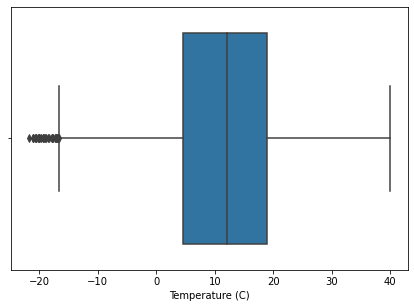

Previous Shape With Outlier:  (95863, 8)


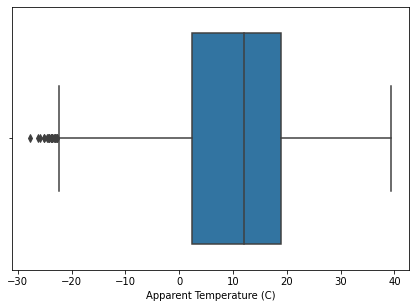

Previous Shape With Outlier:  (95863, 8)


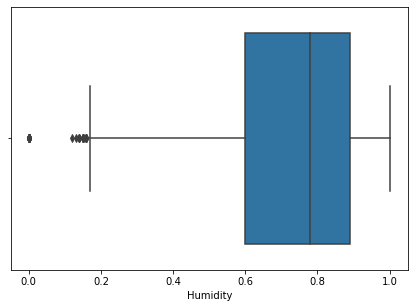

Previous Shape With Outlier:  (95863, 8)


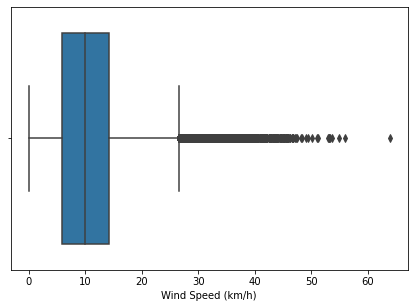

Previous Shape With Outlier:  (95863, 8)


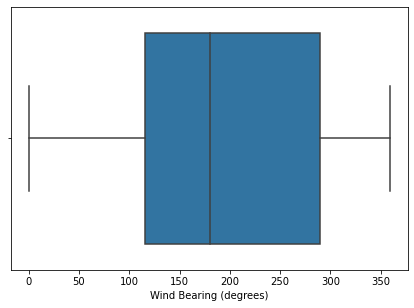

Previous Shape With Outlier:  (95863, 8)


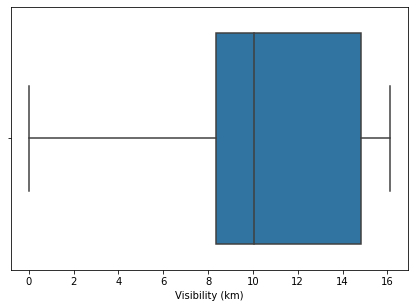

Previous Shape With Outlier:  (95863, 8)


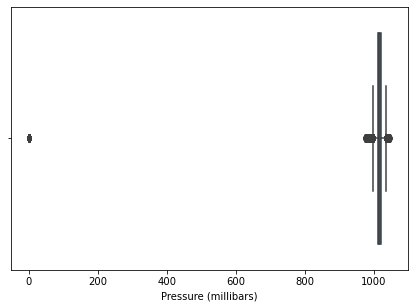

In [13]:
#HANDLING OUTLIER

import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

cols = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 
        'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']    

for col in cols:
    fig, axes = plt.subplots(1,1)
    plt.tight_layout(0.2)
    print("Previous Shape With Outlier: ",df.shape)
    sns.boxplot(df[col],orient='v')
    plt.show()

* The 'Humidity', 'Wind speed (km/h)' and 'Pressure (millibars)' has the outliers. 'Temperature', 'Apparent Temperature' are skewed. there are no outliers in 'wind bearing' and 'visibility'

In [14]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

df2 = df

cols = ['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']    

for col in cols:
    print(col)
    plt.tight_layout(0.2)
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print('lower limit',lower_limit)
    print('upper limit',upper_limit)
    print("------------------------")

Apparent Temperature (C)
lower limit -22.558333333333344
upper limit 43.686111111111124
------------------------
Humidity
lower limit 0.16499999999999992
upper limit 1.3250000000000002
------------------------
Wind Speed (km/h)
lower limit -6.673449999999998
upper limit 26.62135
------------------------
Pressure (millibars)
lower limit 998.1500000000001
upper limit 1034.79
------------------------


<Figure size 432x288 with 0 Axes>

* 'The outliers of the Humidity' are far away datapoints from upper_limit and the lower_limit to the IQR. So here the outliers are replaced by the suitable limits. (upper_limit/lower_limit)

Previous Shape With Outlier:  (95863, 8)
0.6 0.89
0.29000000000000004
0.16499999999999992 1.3250000000000002
Shape After Removing Outliers: (95863, 8)


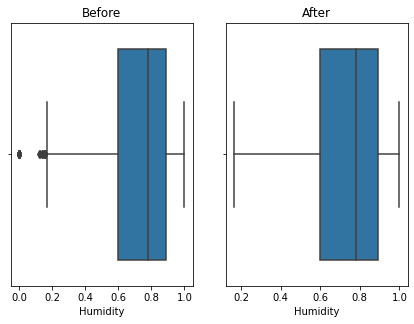

In [15]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

df2 = df

########### HANDLING OUTLIER ######
#def handleOutlier(col):
cols = ['Humidity']    

for col in cols:

    fig, axes = plt.subplots(1,2)
    plt.tight_layout(0.2)
    print("Previous Shape With Outlier: ",df2.shape)
    sns.boxplot(df2[col],orient='v',ax=axes[0])
    axes[0].title.set_text("Before")
    
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    print(Q1,Q3)
    IQR = Q3-Q1
    print(IQR)

    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print(lower_limit,upper_limit)

    df2[col] = np.where(df2[col]>upper_limit,upper_limit,df2[col])
    df2[col] = np.where(df2[col]<lower_limit,lower_limit,df2[col])
    print("Shape After Removing Outliers:", df2.shape)
    sns.boxplot(df2[col],orient='v',ax=axes[1])
    axes[1].title.set_text("After")
    df[col] = df2[col]
    plt.show()

Before Shape: (95863, 8)
After Shape: (94579, 8)


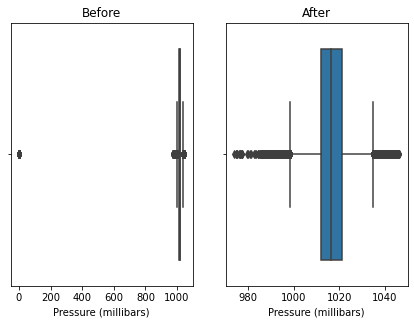

In [16]:
# remove outlier of Pressure (millibars)

fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

df2 = df

col='Pressure (millibars)'

print("Before Shape:",df2.shape)
axes[0].title.set_text("Before")
sns.boxplot(df2[col],orient='v',ax=axes[0])

# Removing ressure (millibars) bellow 800 
df2 = df2[ (df2[col]>800)]
print("After Shape:",df2.shape)

axes[1].title.set_text("After")
sns.boxplot(df2[col],orient='v',ax=axes[1])
df=df2;
plt.show()

# reset indices after dropping rows
df=df.reset_index(drop=True)

* 'Pressure (millibars)' outliers are the lower values to the 200. that rows are dropped. 

8. Data encoding

Numerical variables and categorical variables are in the dataset. So, categorical variables cannot be handled without encoding. Following code shows 'Precip Type' is encoded label encoding. Here simply used label encoding because of only 2 values that need to represent by numerical values. (rain as 0 and snow as 1)


In [17]:
# category encoding
# converting type of col to 'category'
df['Precip Type'] = df['Precip Type'].astype('category').cat.codes
# df['Summary'] = df['Summary'].astype('category').cat.codes
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


9. Splitting the dataset

In here dataset is divided in to 2 parts as training dataset and testing dataset. Here I use 80 presents as training and 20 presents for testing.
Also, the dataset also divided as independent variables and target dataset because our aim to predict the Apparent Temperature. So, 'Apparent Temperature (C)' is the target dataset and rest of features take as independent variables. Splitting the dataset is done before data transformation to avoid data Leakage.


In [18]:
# set apparent temperature as target
columns_value = df.columns
index = np.argwhere(columns_value == 'Apparent Temperature (C)')
columns_value_new = np.delete(columns_value, index)


data = pd.DataFrame(df, columns=columns_value_new)

# target as Y
selected_columns = ['Apparent Temperature (C)']
y_true = df[selected_columns].copy()

# X as indipendent 
X = data

In [19]:
X.head()

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,0,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,0,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,0,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,0,8.755556,0.83,11.0446,259.0,15.8263,1016.51


In [20]:
y_true.head()

,Apparent Temperature (C)
0,7.388889
1,7.227778
2,9.377778
3,5.944444
4,6.977778


In [21]:
from sklearn.model_selection import train_test_split

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(75663, 7) (75663, 1)
(18916, 7) (18916, 1)


In [22]:
# reset the df after dropping rows

X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)


In [23]:
X_train.head()

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,1,-4.983333,0.84,5.5062,120.0,3.8318,1019.49
1,0,23.111111,0.33,14.8281,145.0,10.3523,1018.68
2,0,11.105556,0.67,26.0659,158.0,9.9820,1013.84
3,0,16.033333,0.77,5.9731,121.0,15.1823,1015.03
4,0,8.400000,0.75,11.7530,317.0,9.9820,1017.65


10. Data transformation

The Q-Q plots show the 'Temperature (C)' and 'Pressure (millibars)' lie on the red line that means a normal (or Gaussian) distribution appear in a straight line. 
The ''Wind Speed (km/h)' is right skewed according to the view of the histogram. The 'Humidity' is also left skewed.
Therefore, to reduce the skewness and come to normal distribution form, the 'Wind Speed (km/h)' need to log transformation and the 'Humidity' need to exponent transformation.

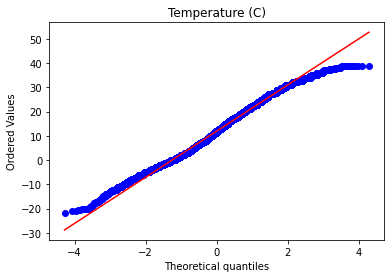

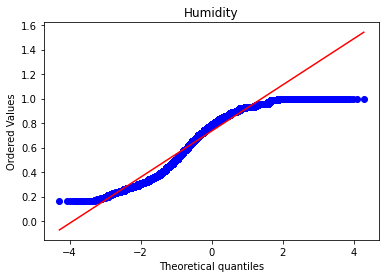

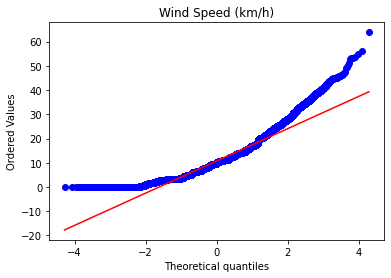

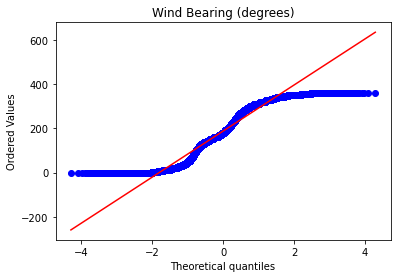

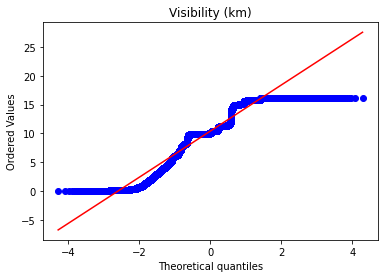

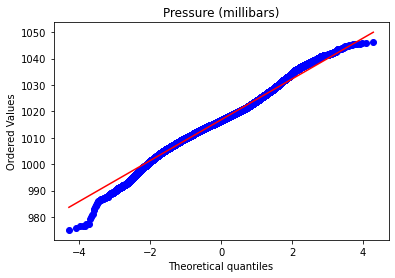

In [24]:
# create and show the plot.
import scipy.stats as stats

#Removing Categorical Features before the standardization
columns_value = X.columns
index1 = np.argwhere(columns_value == 'Precip Type')
# index2 = np.argwhere(columns_value == 'Summary')
columns_value_new = np.delete(columns_value, [index1])#,index2

for col in columns_value_new :
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)
    plt.show()

array([[<AxesSubplot:title={'center':'Precip Type'}>,
        <AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>,
        <AxesSubplot:title={'center':'Wind Speed (km/h)'}>],
       [<AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

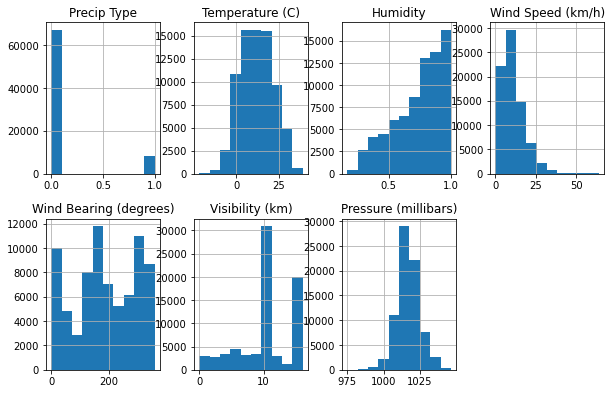

In [25]:
X_train.hist(layout=(3,4), figsize=(10,10))    
# here summary and the precip type are categorical

* to reduce the skewness and come to normal distribution form, the 'Wind Speed (km/h)' need to log transformation. Here I used log(x+1) to avoid 0 values, because log(0) goes to infinity. Here I am not going to drop the 0. If you remove the 0 related rows you need to drop same rows from the target dataset as well.

array([[<AxesSubplot:title={'center':'Precip Type'}>,
        <AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>,
        <AxesSubplot:title={'center':'Wind Speed (km/h)'}>],
       [<AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

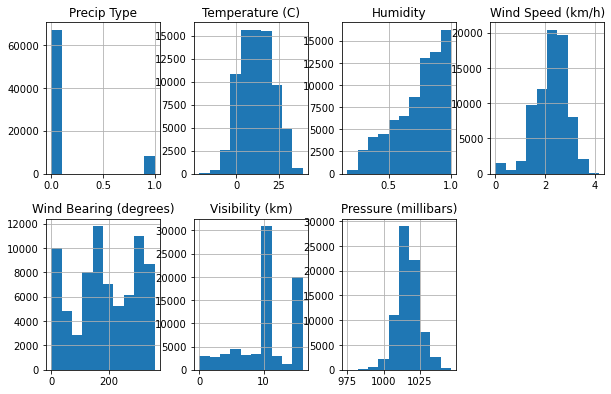

In [26]:
#Do the logarithm trasnformations for required features
from sklearn.preprocessing import FunctionTransformer
logarithm_transformer = FunctionTransformer(np.log1p, validate=True)

# apply the transformation to your data
columns = ['Wind Speed (km/h)']
data_new = logarithm_transformer.transform(X_train[columns])
X_train['Wind Speed (km/h)'] = data_new[:, 0]

X_train.hist(layout=(3,4), figsize=(10,10))   

* to reduce the skewnes and come to noramal distribution form, the 'Humidity' need to exponent transformation.

In [27]:
# Do the trasnformations for required features

columns = ['Humidity']
exp_transformer = FunctionTransformer(np.exp, validate=True) # FunctionTransformer(lambda x:x**3, validate=True) #
data_new = exp_transformer.transform(X_train[columns])
df_new = pd.DataFrame(data_new, columns=columns)
X_train['Humidity'] = data_new[:, 0]

array([[<AxesSubplot:title={'center':'Precip Type'}>,
        <AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>,
        <AxesSubplot:title={'center':'Wind Speed (km/h)'}>],
       [<AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

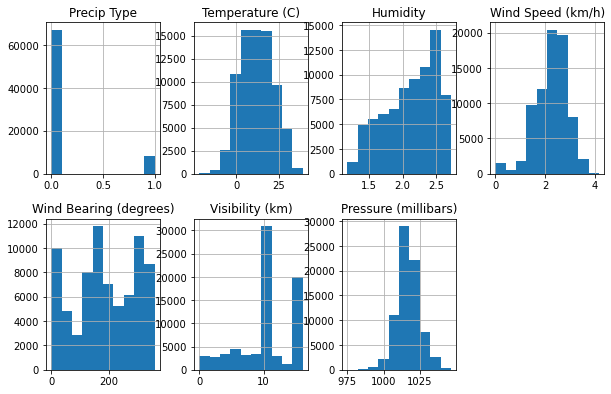

In [28]:
X_train.hist(layout=(3,4), figsize=(10,10)) 

11. Feature Scaling

Feature scaling Standardization methods enable the normalizing the range of values of independent variables. The standard standardization and s min max standardization methods can be identified as standardization methods.

Here, I used the standard standardization method to Feature scaling. standardization sets 0 as mean (μ) and standard deviation (σ) as 1.

It is important to removing categorical features before the standardization.


In [29]:
from sklearn.preprocessing import StandardScaler

#Removing Categorical Features before the standardization
columns_value = X_train.columns

index1 = np.argwhere(columns_value == 'Precip Type')
# index2 = np.argwhere(columns_value == 'Summary')
columns_value_new = np.delete(columns_value, [index1])#,index2

#Applying Standardization 
#step 1 - Calling the standard scaler
scaler = StandardScaler() 

#Transformation of other features
X_Except = pd.DataFrame(X_train, columns=columns_value_new)
scaler.fit(X_Except)
X_Scaled = scaler.transform(X_Except)

X_Scaled_Except = pd.DataFrame(X_Scaled, columns=columns_value_new)
#Joining the Precip Type and Summary to the X again
X_standard = X_Scaled_Except.join([X_train['Precip Type']])#X_train['Summary'], 
X_train = X_standard


array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>,
        <AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>],
       [<AxesSubplot:title={'center':'Visibility (km)'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:title={'center':'Precip Type'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

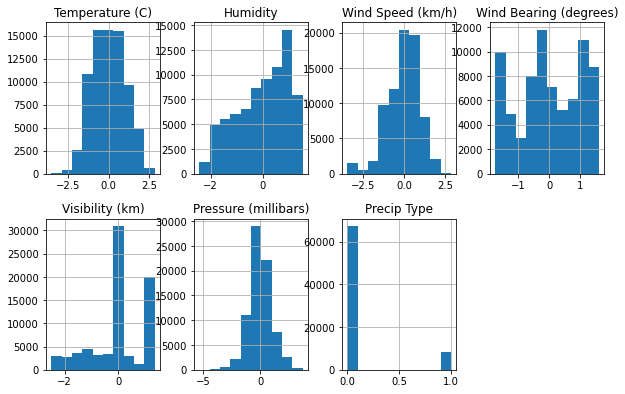

In [30]:
X_train.hist(layout=(3,4), figsize=(10,10)) 

* The features means are very close to the 0 and the std is close to the 1. 

In [31]:
X_train.describe()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type
count,7.566300e+04,7.566300e+04,7.566300e+04,7.566300e+04,7.566300e+04,7.566300e+04,75663.000000
mean,-1.359023e-16,2.683197e-16,5.284810e-16,-7.233038e-17,1.387342e-15,-6.628998e-15,0.110820
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.313912
min,-3.534945e+00,-2.439872e+00,-3.446466e+00,-1.745346e+00,-2.498942e+00,-5.363749e+00,0.000000
25%,-7.592812e-01,-7.793679e-01,-5.446093e-01,-6.647630e-01,-4.771255e-01,-6.018492e-01,0.000000
50%,1.034793e-02,1.490342e-01,1.687565e-01,-6.857905e-02,-8.667915e-02,-3.443564e-02,0.000000
75%,7.218480e-01,8.043667e-01,6.596187e-01,9.561121e-01,1.080794e+00,5.561377e-01,0.000000
max,2.827284e+00,1.535900e+00,2.863474e+00,1.598873e+00,1.366864e+00,3.763761e+00,1.000000


12. Variable Discretization

Variable Discretization transforms the continuous variables in to disrete variables. There are mainly 3 discretization approaches named Supervised, Unsupervised and Custom discretization.

Here we use an unsupervised approach named k-means clustering to the continious variables then the each cluster is considered as a bin. Here I used 8 bins for each features.

It is important to removing categorical features before the variable discretization.


In [32]:
from sklearn.preprocessing import KBinsDiscretizer

#Removing Categorical Features before the standardization
columns_value = X_train.columns
index1 = np.argwhere(columns_value == 'Precip Type')
# index2 = np.argwhere(columns_value == 'Summary')
columns_value_new = np.delete(columns_value, [index1])#, index2

data = pd.DataFrame(X_train, columns=columns_value_new)

# fit the scaler to the  data
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans') 
discretizer.fit(data)
_discretize = discretizer.transform(data)
x = pd.DataFrame(_discretize, columns=columns_value_new)
X_train = x.join([ X_train['Precip Type']]) # X_train['Summary']


array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>,
        <AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>],
       [<AxesSubplot:title={'center':'Visibility (km)'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:title={'center':'Precip Type'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

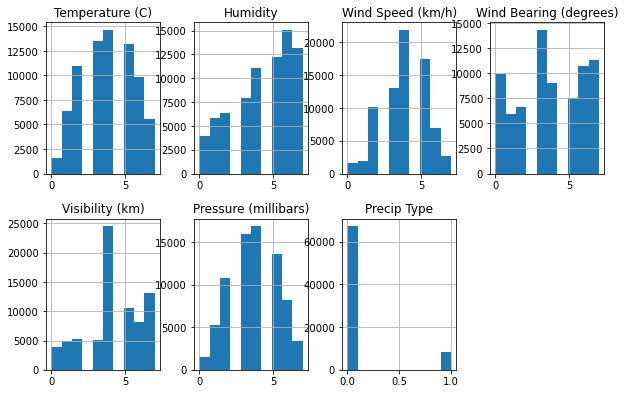

In [33]:
X_train.hist(layout=(3,4), figsize=(10,10)) 

13. Add 10, 12, 11 steps to Y_train

Here, we need add Data transformation, Feature Scaling and Variable Discretization to the our Y_train dataset also. 

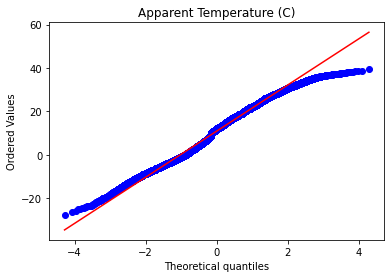

In [34]:
stats.probplot(y_train['Apparent Temperature (C)'], dist="norm", plot=plt)
plt.title('Apparent Temperature (C)')
plt.show()

* the most of the shape lies on the normal (or Gaussian) distribution straight line.

In [35]:
# Applying Standardization 

scaler = StandardScaler() 

y_Except = pd.DataFrame(y_train, columns=columns_value_new)
scaler.fit(y_train)
y_Scaled = scaler.transform(y_train)

y_standard = pd.DataFrame(y_Scaled, columns=y_train.columns)
y_train= y_standard


* the y_train data set scaling

14. Feature Extraction

Feature extraction is a process of dimensionality reduction that identifies important features of the data using the domain knowledge. It helps to only include relevant inputs to machine learning model. More features may lead to a decline in the accuracy, if they include irrelevant features creating the unrequired noise in model.  
 
We identify significant and independent features by using correlation metrix and use PCA to feature reduction.


###### 15. Correlation matrix

Correlation matrix represents the correlations between pairs of variables. it lies bet ween -1 and +1. minus values say that there are negative correlation and positive values says that there are negative correlation.   

r < 0.3 None or very weak
0.3 < r <0.5 Weak
0.5 < r < 0.7 Moderate
r > 0.7 Strong

According to the heatmap in the dataset we can conclude that

* humidity and temperature (-0.60) -> moderately negative correlation
* humidity and Apparent temperature (-0.59) -> moderately negative correlation
* Visibility and Apparent temperature (0.38) -> weak positive correlation
* Precip tye and Apparent temperature (-0.56) -> moderately negative correlation

According to the our use case, the answer to the,

1st question "Is there a relationship between humidity and temperature?" is
"YES" 
    * humidity and temperature (-0.60) has moderately negative correlation
    
2nd question "What about between humidity and apparent temperature?"
    * humidity and Apparent temperature (-0.59) has moderately negative correlation
    
2nd question "Can you predict the apparent temperature given the humidity?"
    * Here we can not say directly predict apparent temperature by given humidity because the apparent temerature is depend on 
     Temperature, humidity, Precip type and as well as visibility
     
There are Temperature, humidity, Precip type direct pairly moderate relationship with the Apparent temperature. The visibility has weak relationship with the Apparent temperature.

In [36]:
df_for_feature_eng = X_train.copy()
df_for_feature_eng.join(y_train['Apparent Temperature (C)'])
df_for_feature_eng['Apparent Temperature (C)'] = y_train['Apparent Temperature (C)']

<Figure size 1152x432 with 0 Axes>

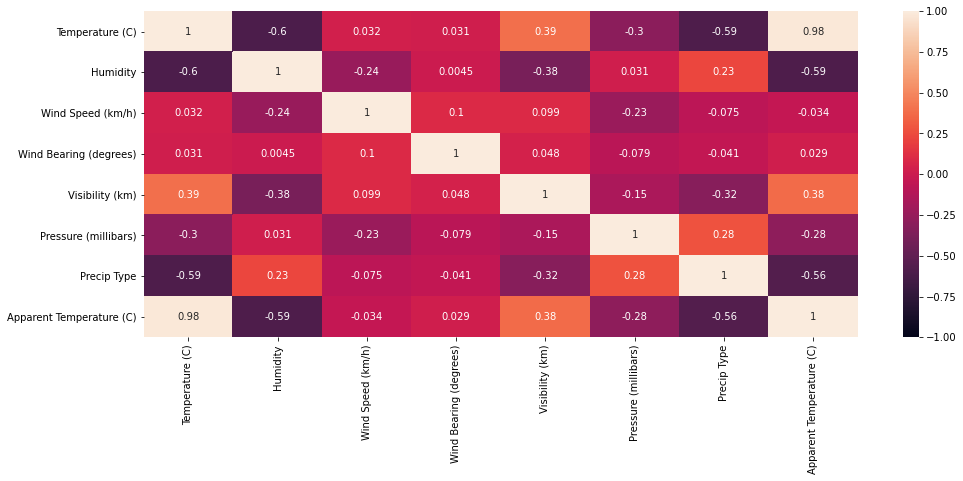

In [37]:
#correlation matrix

plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_for_feature_eng.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.

16. Principle Component Analysis (PCA)

PCA is used commonly as Feature extraction technique to reduce the dimensions of the dataset.

By using the attribute explained_variance_ratio_ the variaence first principal components contains upto 95% are taken to the model training. The training model takes 6 components contain 97.54% of the information.


In [38]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_train) 

principalDf = pd.DataFrame(data = X_pca)
principalDf.head(10)

,0,1,2,3,4,5,6
0,4.125223,1.489704,1.428489,1.384611,0.211632,1.344316,0.463804
1,-3.818240,1.401229,1.670703,2.487761,0.125518,0.165665,-0.006659
2,-0.702481,0.416286,-1.194237,1.729317,2.179469,-0.982743,-0.042109
3,-0.880266,1.710211,-1.314178,-1.641228,-0.901048,-0.338235,0.077143
4,-0.014631,-3.216684,0.975458,0.159061,0.305362,0.631528,-0.234378
5,-4.948243,-2.528668,2.007811,2.973028,0.074638,-0.786541,0.136833
6,4.218447,-2.185904,3.456031,1.249467,-2.069974,-0.793381,-0.295501
7,0.503150,-0.391242,0.562006,-0.801774,1.587045,-0.784833,-0.157906
8,0.847816,3.599900,0.455424,-0.534905,2.508726,0.211887,-0.320569
9,-0.749253,-1.196528,1.015385,-1.255486,1.907495,-0.266655,-0.177828


In [39]:
pca.explained_variance_ratio_

array([0.35201537, 0.24660022, 0.13341961, 0.12080237, 0.10165006,
       0.04283339, 0.00267898])

In [40]:
arr = pca.explained_variance_ratio_

In [41]:
sum = 0
length = len(pca.explained_variance_ratio_)
for i in range(length):
    if sum>0.95:
        break
    else:
        sum+=arr[i]
n_com=i
print('sum ', n_com, sum)

sum  5 0.9544876331431522


17. Train Model

The next step is implemented a model with our prepared data set. Here, I use the linear regression to implement the model for our problem domain that predict the Apparent temperature.

The linear Regression techniques used to implement a linear relationship between the independent/s(X) and the dependent(Y) variables. It predicts the dependent variable based on independent variable.


In [42]:
pca = PCA(n_components=n_com)
X_transformed = pca.fit_transform(X_train)
X = X_transformed

In [43]:
#Implementing Linear Regression

from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X, y_train)

18. Preprocess the testing data set

Here after the training dataset, we need messure the accuracy of the dataset. So, now we need to deal with the training dataset. So, here first so the transformation, Feature scaling and the data discretizations to the training dataset.


* the trasnformations need to the humidity and the wind speed

array([[<AxesSubplot:title={'center':'Precip Type'}>,
        <AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>,
        <AxesSubplot:title={'center':'Wind Speed (km/h)'}>],
       [<AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

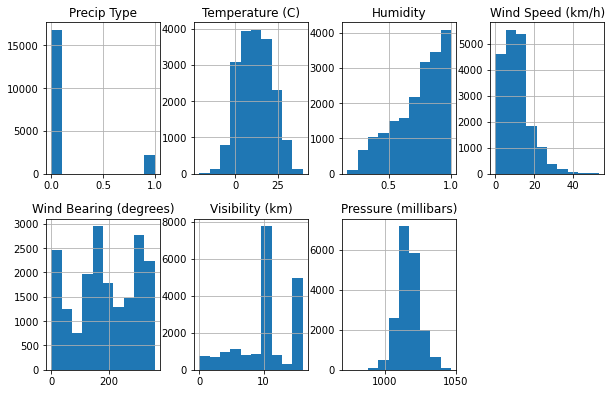

In [44]:
X_test.hist(layout=(3,4), figsize=(10,10))  

In [45]:
#Do the  trasnformations for required features

from sklearn.preprocessing import FunctionTransformer
logarithm_transformer = FunctionTransformer(np.log1p, validate=True)

# apply the transformation to your data
columns = ['Wind Speed (km/h)']
data_new = logarithm_transformer.transform(X_test[columns])
X_test['Wind Speed (km/h)'] = data_new[:, 0]


columns = ['Humidity']
exp_transformer = FunctionTransformer(np.exp, validate=True) #FunctionTransformer(lambda x:x**3, validate=True)
data_new = exp_transformer.transform(X_test[columns])
df_new = pd.DataFrame(data_new, columns=columns)
X_test['Humidity'] = data_new[:, 0]

from sklearn.preprocessing import StandardScaler

#Removing Categorical Features before the standardization
columns_value = X_test.columns
index1 = np.argwhere(columns_value == 'Precip Type')
# index2 = np.argwhere(columns_value == 'Summary')
columns_value_new = np.delete(columns_value, [index1])#,index2

# Applying Standardization 

scaler = StandardScaler() 

# # for y_train
X_Except = pd.DataFrame(X_test, columns=columns_value_new)
scaler.fit(X_Except)
X_Scaled = scaler.transform(X_Except)

X_Scaled_Except = pd.DataFrame(X_Scaled, columns=columns_value_new)
#Joining the Precip Type to the X again
X_standard = X_Scaled_Except.join([ X_test['Precip Type']]) #X_test['Summary'],
X_test = X_standard

# for y_test
y_Except = pd.DataFrame(y_test, columns=columns_value_new)
scaler.fit(y_test)
y_Scaled = scaler.transform(y_test)

y_standard = pd.DataFrame(y_Scaled, columns=y_test.columns)
y_test= y_standard

########################

# Applying Data Discretization 

from sklearn.preprocessing import KBinsDiscretizer

columns_value = X_test.columns
index1 = np.argwhere(columns_value == 'Precip Type')
# index2 = np.argwhere(columns_value == 'Summary')
columns_value_new = np.delete(columns_value, [index1])#,index2

data = pd.DataFrame(X_test, columns=columns_value_new)

# fit the scaler to the  data
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans') 
discretizer.fit(data)
_discretize = discretizer.transform(data)
x = pd.DataFrame(_discretize, columns=columns_value_new)
X_test = x.join([X_test['Precip Type']])#X_test['Summary'], 
X_test.head()




,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type
0,6.0,1.0,5.0,3.0,4.0,3.0,0
1,4.0,3.0,6.0,1.0,4.0,4.0,0
2,6.0,2.0,2.0,0.0,7.0,4.0,0
3,2.0,6.0,3.0,1.0,2.0,5.0,1
4,2.0,6.0,5.0,4.0,3.0,6.0,0


19. Testing
The purpose of the testing the model is to measure the accuracy and efficiency of the model. According to the accuracy level we need to improve our model also.

The following steps are available the code to prediction and the measure the accuracy.


In [46]:
X_pca_test = PCA(n_components=n_com)
X_transformed_test = pca.fit_transform(X_test)
X_test = X_transformed_test

In [47]:
# prediction
predictions = model.predict(X_test)
y_hat = pd.DataFrame(predictions, columns=["predicted"])
print(y_hat.head(10)) 

   predicted
0   1.152625
1  -0.209384
2   1.493243
3  -0.982407
4  -1.405345
5   0.314785
6   1.089812
7   0.121080
8  -0.314251
9  -0.856527


In [48]:
y_test.head(10)

,Apparent Temperature (C)
0,1.315782
1,0.381913
2,0.979257
3,-1.221895
4,-1.091225
5,0.206132
6,1.051333
7,0.226354
8,0.162057
9,0.280281


20. Evaluate the model

to the evaluate the linear regression model we can use Mean squad error (MSE), Root mean squad error (RMSE) and Mean absolute error (MAE).


In [49]:
# Calcualting MSE of y_hat and y

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_hat)
print('Mean squard error (MSE) = ', mse)

Mean squard error (MSE) =  0.1338079355234194


In [50]:
#Root Mean Sqaured Error

from math import sqrt
rmsq = sqrt(mean_squared_error(y_test, y_hat))
print('Root mean suqard error (RMSE) = ', rmsq)

Root mean suqard error (RMSE) =  0.3657976701995509


In [51]:
#Percentage of explained variance of the predictions
print('score', model.score(X_test, y_test))

score 0.8661920644765806


In [52]:
# Intercept of the model
print(model.intercept_)

[-1.06144854e-16]


In [53]:
# W parameters of the model
print('W parameters of the model', model.coef_)

W parameters of the model [[-0.283544    0.03990891 -0.02684158  0.06844647 -0.33305591]]


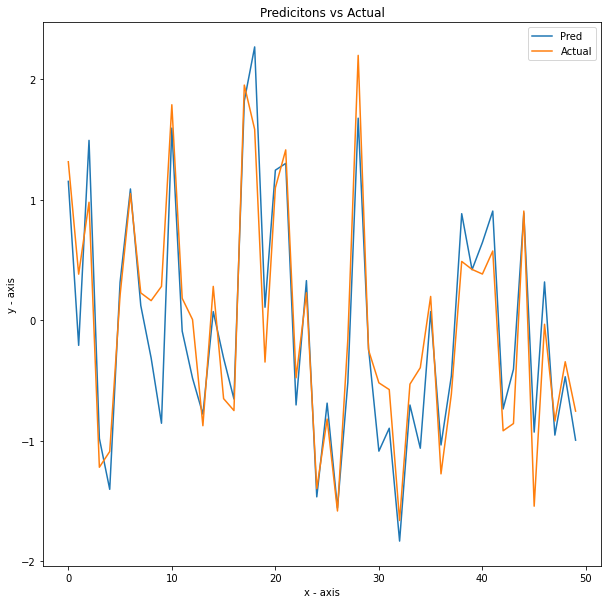

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(y_hat[:50], label = "Pred")
plt.plot(y_test[:50], label = "Actual")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Predicitons vs Actual')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()